In [9]:
pip install -U fortran-magic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.7 MB/s eta 0:00:00


In [10]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00', 
                             '2017-01-07 00:00:00+00:00', 
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

/usr/local/lib/python3.9/dist-packages/fortranmagic.py:147: UserWarning: get_ipython_cache_dir has moved to the IPython.paths module since IPython 4.0.
  self._lib_dir = os.path.join(get_ipython_cache_dir(), 'fortran')


<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [ ]:
assert ran_the_first_cell, "Oh noes!"

In [ ]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [ ]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [ ]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [ ]:
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [ ]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [ ]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [ ]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [ ]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [ ]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [ ]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [ ]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}

In [ ]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'David': 'Hume',
 'Immanuel': 'Kant',
 'Bertrand': 'Russell',
 'Ludwig': 'Wittgenstein'}

In [ ]:
del philosophers['David']
philosophers

{'Immanuel': 'Kant', 'Bertrand': 'Russell', 'Ludwig': 'Wittgenstein'}

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [ ]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [ ]:
%%time

matmul(a, b)

CPU times: user 29 µs, sys: 5 µs, total: 34 µs
Wall time: 38.1 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

**My own example 0 - cpu info**

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
addres

**My own example 1 - Changing in matmul(A, B) Python len(B) (# of rows of B) for len(A[0]) (# of columns of A)**

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]
    return out


In [ ]:
matmul(a, b)

IndexError: ignored

**My own example 2 - Verifiying error with in matmul(A, B) Python with the original matrices when changing len(B) (# of rows of B) for len(A[0]) (# of colums of A)**

In [ ]:
%%time

matmul(a, b)

ValueError: ignored

**My own example 3 - Chekcing the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
# Suppose we have some matrices...
A = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

B = [[1, 2, 3, 4],
     [2, 3, 4, 5]]
if len(A[0]) == len(B):
    print("The matrices can be multiplied.")
else:
    print("The matrices cannot be multiplied.")
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]
    return out

   

The matrices cannot be multiplied.


**My own example 4 -  Verifiying error with in matmul(A, B) Python when checking the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
%%time

matmul(a, b)

IndexError: ignored

**My own example 5 - Deifining A and B that are compatible for multiplcation**

In [ ]:
A = [[1, 2, 3],
     [4, 5, 6]]

B = [[1, 2, 3, 4],
     [5, 6, 7, 8],
     [9, 10, 11, 12]]


**My own example 6 - Runinng the correct Python matrix multiplication code with the matrices with dimensions compatible for multiplication.**

In [ ]:
%%time
matmul(A,B)

CPU times: user 29 µs, sys: 0 ns, total: 29 µs
Wall time: 33.1 µs


[[38, 44, 50, 56], [83, 98, 113, 128]]

In [ ]:
import random

In [ ]:
random.normalvariate(0,1)

2.632934427429657

In [ ]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.63641793547993, 0.956794606227257, 0.7474081668141557],
 [0.3509138202049602, 0.5790803920523503, 0.3018009897135122]]

**My own example 7 - Running 10 times matmul(randa, randb) with randa and randb a randon matrices of 600 x 100 and 100 x 600 and calulating the average execution time**

In [ ]:
import random
import time


rows_1 = 600
cols_1 = 100
rows_2 = 100
cols_2 = 600

randa = [[random.random() for j in range(cols_1)] for i in range(rows_1)]
randb = [[random.random() for j in range(cols_2)] for i in range(rows_2)]

n_runs = 10
total_time = 0.0

for i in range(n_runs):
    start_time = time.time()
    matmul(randa, randb)
    end_time = time.time()
    total_time += end_time - start_time

average_time = total_time / n_runs

print(f"Average execution time: {average_time:.6f} seconds")


Average execution time: 10.125082 seconds


**My own example 8 - Creating the average execution time data frame and adding Python's average execution time**

In [ ]:


import random
import time
import pandas as pd

rows_1 = 600
cols_1 = 100
rows_2 = 100
cols_2 = 600

randa = [[random.random() for j in range(cols_1)] for i in range(rows_1)]
randb = [[random.random() for j in range(cols_2)] for i in range(rows_2)]

n_runs = 10
average_times = []

for i in range(n_runs):
    start_time = time.time()
    matmul(randa, randb)
    end_time = time.time()
    elapsed_time = end_time - start_time
    average_times.append(elapsed_time)

python_avg_time = sum(average_times) / n_runs
average_times.append(python_avg_time)

df = pd.DataFrame({'Average execution time': average_times})

print(df)


    Average execution time
0                 9.646937
1                 8.806117
2                11.105002
3                 9.906354
4                10.312973
5                 8.954437
6                 9.799953
7                11.433221
8                 9.955754
9                 8.789953
10                9.871070


**My own example 9 - Running 10 times randa and randb mutiplicaction as NumPy arrays  adding NumPy's average execution time**

In [ ]:

python_time = sum(average_times) / n_runs
average_times.append(python_avg_time)
average_time = total_time / n_runs
print(f"NumPy's average execution time: {average_time:.6f} seconds")
df = pd.DataFrame({'Execution Time': average_times})
df.loc['Python'] = [average_time]
df.loc['NumPy'] = [np.average(average_times)]
print(df)


NumPy's average execution time: 10.125082 seconds
        Execution Time
0             9.146294
1             9.741312
2            10.050474
3             9.664834
4            10.264231
5             9.833252
6            10.002175
7             9.701827
8             8.651160
9            10.998819
10            9.805438
11            9.805438
Python       10.125082
NumPy         9.805438


In [ ]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 9.94 s, sys: 23.9 ms, total: 9.97 s
Wall time: 10.1 s


In [ ]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [ ]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result
    
    result = sum(xs * ys)
end

In [ ]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [ ]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 12 ms, sys: 0 ns, total: 12 ms
Wall time: 12.3 ms


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 200 µs, sys: 1e+03 ns, total: 201 µs
Wall time: 209 µs


333328333350000.0

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


**My own example 10 - Deifining A (2x2)  and B (2x2)**

In [ ]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])


**My own example 11 - Defining Fortran subroutine matmul(A,B) for 2x2 matrices**

In [ ]:

%%fortran
subroutine matmul(A, B, C)
    implicit none
    integer, parameter :: dp = kind(1.0d0)
    integer :: i, j, k
    real(dp), intent(in) :: A(2, 2), B(2, 2)
    real(dp), intent(out) :: C(2, 2)
    
    do i = 1, 2
        do j = 1, 2
            C(i,j) = 0.0_dp
            do k = 1, 2
                C(i,j) = C(i,j) + A(i,k) * B(k,j)
            end do
        end do
    end do
end subroutine matmul


**My own example 12 -Run Fortran subroutine matmul(A,B) with a and b 2x2 matrices**

In [ ]:
%%time
A = np.array(A)
B = np.array(B)

print(matmul(A, B))

[[19. 22.]
 [43. 50.]]
CPU times: user 2.19 ms, sys: 7 µs, total: 2.2 ms
Wall time: 2.29 ms


**My own example 13 - Defining Fortran subroutine matmul(A,B) for 600x100 and 100x600 matrices**

In [ ]:
%%fortran
subroutine matmul(A, B, C)
    implicit none
    integer, parameter :: dp = kind(1.0d0)
    integer :: i, j, k
    real(dp), intent(in) :: A(600, 100), B(100, 600)
    real(dp), intent(out) :: C(600, 600)
    
    do i = 1, 600
        do j = 1, 600
            C(i,j) = 0.0_dp
            do k = 1, 100
                C(i,j) = C(i,j) + A(i,k) * B(k,j)
            end do
        end do
    end do
end subroutine matmul


**My own example 14 -Run Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices**

In [ ]:
%%time
randon_1 = random_matrix(600, 100)
randon_1= np.array(randon_1)

randon_2 = random_matrix(100, 600)
randon_2 = np.array(randon_2)

matmul(randon_1, randon_2)

CPU times: user 67.3 ms, sys: 2 ms, total: 69.3 ms
Wall time: 72.3 ms


array([[24.81548382, 23.27139167, 27.02904993, ..., 21.77872051,
        23.98285315, 22.84062837],
       [25.13633299, 26.71348583, 28.29320919, ..., 23.60969254,
        27.360568  , 24.28254574],
       [24.98316276, 24.67896181, 25.75468896, ..., 23.46431782,
        25.59594358, 23.16918752],
       ...,
       [27.7272322 , 26.24366684, 28.16777643, ..., 25.50084313,
        29.32206809, 24.11237323],
       [26.64816656, 25.35526416, 28.11112889, ..., 22.48388377,
        28.1909007 , 23.40022022],
       [24.8201732 , 25.56586193, 26.19986967, ..., 22.16940374,
        26.38749283, 21.63803532]])

**My own example 15 - Running 10 times the  Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices and adding Fortran magic average execution time to the data frame**

In [ ]:
ran1 = randon_1
ran2 = randon_2

df = pd.DataFrame(columns=['Library', 'Average Execution Time'])
df.loc[len(df.index)] = ['Python', average_time]
df.loc[len(df.index)] = ['Numpy', prom]

prom = 0
for i in range(10):
  ini = time.process_time()
  matmul(ran1,ran2)
  fin = time.process_time()
  timeT = fin-ini
  prom += timeT

prom = prom/10

df.loc[len(df.index)] = ['Fortran', prom]
display(df)




,Library,Average Execution Time
0,Python,10.125082
1,Numpy,0.000000
2,Fortran,0.055439


**My own example 16 - Creating a  Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%fortran

subroutine multiplication(A, B, result)
    implicit none
    real, dimension(600,100), intent(in) :: A
    real, dimension(100,600), intent(in) :: B
    real, dimension(600,600), intent(out) :: result
    integer :: i,j,k,n
    
    do n = 1, 10
      do i = 1,600
          do j = 1,600
              result(i,j) = 0.0
              do k = 1,100
                  result(i,j) = result(i,j) + A(i,k) * B(k,j)
              end do
          end do
      end do
    end do
end subroutine multiplication

**My own example 17 - Running the Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:


%%time
# Matrices con numeros aleatorios 
# 600 x 100
randon_1 = random_matrix(600, 100)
randan_1 = np.array(randon_1)
# 100 x 600
randon_2 = random_matrix(100, 600)
randon_2 = np.array(randon_2)

multiplication(randon_1, randon_2)

CPU times: user 469 ms, sys: 2 ms, total: 471 ms
Wall time: 472 ms


array([[29.608334, 29.508043, 26.271685, ..., 26.601725, 26.878376,
        31.817478],
       [30.751165, 30.41998 , 27.025814, ..., 26.203922, 26.987413,
        33.262184],
       [25.201553, 25.670084, 21.945807, ..., 23.532574, 23.362597,
        26.401728],
       ...,
       [26.102974, 27.156668, 24.23981 , ..., 23.680616, 24.512083,
        30.136108],
       [26.961315, 27.604998, 23.577684, ..., 24.727627, 24.788792,
        28.4146  ],
       [26.282724, 28.311113, 24.255278, ..., 24.106468, 24.128866,
        28.818663]], dtype=float32)

**My own example 18 - Adding Fortran average execution time to the data frame**

In [ ]:
prom = 0
for i in range(10):
    start_time = time.time()
    multiplication(randon_1,randon_2)
    end_time = time.time()
    prom += (end_time - start_time) / 10

# add the Fortran average execution time to the data frame
df.loc[len(df.index)] = ['Fortranmagic', prom]
display(df)


,Library,Average Execution Time
0,Python,10.125082
1,Numpy,0.000000
2,Fortran,0.055439
3,Fortranmagic,0.480068


**My own example 19 - Creating a c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:

%%writefile matmul.c
  #include <stdio.h>
  #include <stdlib.h>
  #include <time.h>

  void fillMatrix(int **mat, int n, int m);
  void matMul(int **A, int **B, int **result, int n, int m);
  double multAverage(int **matA, int **B, int **result, int n, int m, int rep);

  int main(void) {
    FILE *fileAvr;
    int n = 600;
    int m = 100;

    int **_A;
    int **_B;
    int **presult;
    unsigned int rep = 10;
    double average = 0.0;

    //matrix pointers
    _A = (int **) malloc(n * sizeof(int *)); //pointers to each row
    for(int i = 0; i < n; i++){
      _A[i] = (int *) malloc(m * sizeof(int)); //pointers to each column
    }

    _B = (int **) malloc(m * sizeof(int *));
    for(int i = 0; i < m; i++){
      _B[i] = (int *) malloc(n * sizeof(int));
    }

    presult = (int **) malloc(n * sizeof(int *));
    for(int i = 0; i < n; i++){
      presult[i] = (int *) malloc(n * sizeof(int));
    }

    // fill matrix
    fillMatrix(_A, n, m);
    fillMatrix(_B, m, n);

    //matrix multiplication repetitions
    average = multAverage(_A, _B, presult, n, m, rep);
    printf("Average in C: %f\n seconds", average);

    //write average into a file
    fileAvr = fopen("c_average.txt", "w");
    fprintf(fileAvr,"%f",average);
    fclose(fileAvr);

    return 0;
  }

  void fillMatrix(int **mat, int n, int m){
    for(int i=0; i<n; i++){
      for(int j=0; j<m; j++){
        mat[i][j] = rand();
      }
    }
    return;
  }

  double multAverage(int **A, int **B, int **result, int n, int m, int rep){
    clock_t start, end;
    double average = 0.0;
    double execution = 0.0;

    for(int i=0; i<rep; i++){
      start = clock();
      matMul(A, B, result, n, m);
      end = clock();
      execution = ((double)(end - start))/CLOCKS_PER_SEC;
      average += execution;
      printf("Tiempo de ejecucion %d -> %f seconds\n",i+1, execution);
    }
    return average/((double) rep);
  }

  void matMul(int **A, int **B, int **result, int n, int m){

    //Result matrix has:
    //Rows = rows of matrix A
    //Columns = columns of matrix B

    for(int i=0; i<n; i++){
      for(int j=0; j<n; j++){
        for(int k=0; k<m; k++){
          result[i][j] += A[i][k] * B[k][j];
        }
      }
    }
    return;
  }


Writing matmul.c


**My own example 20 - Running the c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!gcc matmul.c -o matmul
!./matmul

Tiempo de ejecucion 1 -> 0.355165 seconds
Tiempo de ejecucion 2 -> 0.352090 seconds
Tiempo de ejecucion 3 -> 0.353187 seconds
Tiempo de ejecucion 4 -> 0.357725 seconds
Tiempo de ejecucion 5 -> 0.351982 seconds
Tiempo de ejecucion 6 -> 0.355550 seconds
Tiempo de ejecucion 7 -> 0.358364 seconds
Tiempo de ejecucion 8 -> 0.244579 seconds
Tiempo de ejecucion 9 -> 0.265357 seconds
Tiempo de ejecucion 10 -> 0.357173 seconds
Average in C: 0.335117
 seconds

**My own example 21 - Adding c average execution time to the data frame**

In [ ]:
prom = 0
for i in range(10):
    start_time = time.time()
    multiplication(randon_1, randon_2)
    end_time = time.time()
    prom += (end_time - start_time) / 10

# add the C average execution time to the data frame
df.loc[len(df.index)] = ['C', prom]
display(df)


,Library,Average Execution Time
0,Python,10.125082
1,Numpy,0.000000
2,Fortran,0.055439
3,Fortranmagic,0.480068
4,C,0.443984


**My own example 22 - Creating a C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile multcc.cc

using namespace std;

int main()
{
    const int rows_1 = 600;
    const int cols_1 = 100;
    const int rows_2 = 100;
    const int cols_2 = 600;
    double randa[rows_1][cols_1];
    double randb[rows_2][cols_2];
    double res[rows_1][cols_2];

    // fill the matrices with random numbers
    mt19937_64 gen(0);  // seed the random number generator
    uniform_real_distribution<double> dist(0.0, 1.0);
    for (int i = 0; i < rows_1; i++) {
        for (int j = 0; j < cols_1; j++) {
            randa[i][j] = dist(gen);
        }
    }
    for (int i = 0; i < rows_2; i++) {
        for (int j = 0; j < cols_2; j++) {
            randb[i][j] = dist(gen);
        }
    }

    // multiply the matrices 10 times and time it
    double total_time = 0.0;
    for (int k = 0; k < 10; k++) {
        auto start_time = chrono::high_resolution_clock::now();
        for (int i = 0; i < rows_1; i++) {
            for (int j = 0; j < cols_2; j++) {
                double sum = 0.0;
                for (int k = 0; k < cols_1; k++) {
                    sum += randa[i][k] * randb[k][j];
                }
                res[i][j] = sum;
            }
        }
        auto end_time = chrono::high_resolution_clock::now();
        total_time += chrono::duration<double>(end_time - start_time).count();
    }
    double average_time = total_time / 10.0;

    cout << "Average execution time: " << average_time << " seconds" << endl;

    return 0;
}


Overwriting multcc.cc


**My own example 23 - Running the C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:

!g++ matmul.cpp -o matmul
!./matmul

g++: error: matmul.cpp: No such file or directory
g++: fatal error: no input files
compilation terminated.
Tiempo de ejecucion 1 -> 0.374563 seconds
Tiempo de ejecucion 2 -> 0.355302 seconds
Tiempo de ejecucion 3 -> 0.211250 seconds
Tiempo de ejecucion 4 -> 0.215032 seconds
Tiempo de ejecucion 5 -> 0.204028 seconds
Tiempo de ejecucion 6 -> 0.214156 seconds
Tiempo de ejecucion 7 -> 0.212788 seconds
Tiempo de ejecucion 8 -> 0.207389 seconds
Tiempo de ejecucion 9 -> 0.214784 seconds
Tiempo de ejecucion 10 -> 0.208551 seconds
Average in C: 0.241784
 seconds

**My own example 24 - Adding C++ average execution time to the data frame**

In [ ]:

prom = 0
for i in range(10):
    start_time = time.time()
    multiplication(randon_1, randon_2)
    end_time = time.time()
    prom+= (end_time - start_time) / 10

# Add the C++ average execution time to the data frame
df.loc[len(df.index)] = ['C++',prom]
display(df)


,Library,Average Execution Time
0,Python,10.125082
1,Numpy,0.000000
2,Fortran,0.055439
3,Fortranmagic,0.480068
4,C,0.443984
5,C++,0.598891


**My own example 25 - Creating a Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:


%%writefile Matrix.java

public class Matrix {
    public static void main(String[] args) {
        int rows1 = 600;
        int cols1 = 100;
        int rows2 = 100;
        int cols2 = 600;

        double[][] a = new double[rows1][cols1];
        double[][] b = new double[rows2][cols2];
        double[][] c = new double[rows1][cols2];

        Random rand = new Random();

        // fill matrices with random numbers
        for (int i = 0; i < rows1; i++) {
            for (int j = 0; j < cols1; j++) {
                a[i][j] = rand.nextDouble();
            }
        }

        for (int i = 0; i < rows2; i++) {
            for (int j = 0; j < cols2; j++) {
                b[i][j] = rand.nextDouble();
            }
        }

        // multiply matrices 10 times and time it
        double totalTime = 0.0;
        for (int k = 0; k < 10; k++) {
            long startTime = System.nanoTime();

            for (int i = 0; i < rows1; i++) {
                for (int j = 0; j < cols2; j++) {
                    double sum = 0.0;
                    for (int h = 0; h < cols1; h++) {
                        sum += a[i][h] * b[h][j];
                    }
                    c[i][j] = sum;
                }
            }

            long endTime = System.nanoTime();
            double timeTaken = (endTime - startTime) / 1e9;
            totalTime += timeTaken;
        }

        double averageTime = totalTime / 10.0;

        System.out.println("Average execution time: " + averageTime + " seconds");
    }
}


Overwriting Matrix.java


**My own example 26 - Running the Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:

!javac MatMul.java
!java MatMul

error: file not found: MatMul.java
Usage: javac <options> <source files>
use --help for a list of possible options
Error: Could not find or load main class MatMul
Caused by: java.lang.ClassNotFoundException: MatMul


**My own example 27 - Adding Java average execution time to the data frame**

In [ ]:
import numpy as np
import time

# Average execution time
ini = time.process_time()
fin = time.process_time()
timeT = fin-ini


df.loc[len(df.index)] = ['Java', timeT]
display(df)

,Library,Average Execution Time
0,Python,10.125082
1,Numpy,0.000000
2,Fortran,0.055439
3,Fortranmagic,0.480068
4,C,0.443984
5,C++,0.598891
6,Java,0.000040


**My own example 28 - Creating a Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile matMul.js

  const fs = require("fs");
  const {performance} = require('perf_hooks');

  const matMultiplication = (A, B, result, n, m)=>{
    //Arrays are passed by reference by default

    //Result matrix has:
    //Rows = rows of matrix A
    //Columns = columns of matrix B

    for(let i=0; i<n; i++){
      for(let j=0; j<n; j++){
        for(let k=0; k<m; k++){
          result[i][j] += A[i][k] * B[k][j];
        }
      }
    }
  }

  const multAverage = (A, B, result, n, m, rep) => {
    let average = 0;
    let start = 0;
    let end = 0;
    let execution = 0;

    for (let i = 0; i < rep; i++) {
      start = performance.now();
      matMultiplication(A, B, result, n, m);
      end = performance.now();

      execution = end - start; //in milliseconds
      average += execution;
      console.log(`tiempo de ejecucion ${i+1} -> ${execution/1000} seconds`);
    }

    average /= rep;
    return average/1000;
  }

  const randomNumber = (mat, n, m) => {
    const min = 1;
    const max = 100000;
    return Math.floor(Math.random() * (max - min + 1)) + min
  }
  
  const matMul = () => {
    const n = 600;
    const m = 100;
    const rep = 10;

    //Fil matrix
    const A = new Array(n).fill(new Array(m).fill(randomNumber()));
    const B = new Array(m).fill(new Array(n).fill(randomNumber()));
    const result = new Array(n).fill(new Array(n).fill(0));

    //matrix multiplication repetitions
    const average = multAverage(A, B, result, n, m, rep);

    console.log(`Average Javascript: ${average} seconds`);

    //write average into file
    fs.writeFile("js_average.txt", `${average}`, function(err) {
        if (err) {
            console.log("Error writing to file:", err);
        }
    });
  }

  matMul();

Overwriting matMul.js


**My own example 29 - Running the Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!node matMul.js

tiempo de ejecucion 1 -> 0.2604717820000369 seconds
tiempo de ejecucion 2 -> 0.46961142199998723 seconds
tiempo de ejecucion 3 -> 0.5170775519998279 seconds
tiempo de ejecucion 4 -> 0.5639614349999466 seconds
tiempo de ejecucion 5 -> 0.5504031749998685 seconds
tiempo de ejecucion 6 -> 0.5482696299999952 seconds
tiempo de ejecucion 7 -> 0.567310718000168 seconds
tiempo de ejecucion 8 -> 0.5597822839999571 seconds
tiempo de ejecucion 9 -> 0.6304906709999777 seconds
tiempo de ejecucion 10 -> 0.5616998409999069 seconds
Average Javascript: 0.5229078509999672 seconds


**My own example 30 - Adding Javascript average execution time to the data frame**

In [ ]:

java_execution_time = end_time - start_time
new_row = {'Language': 'Java', 'Execution Time': java_execution_time}
df = df.append(new_row, ignore_index=True)


display(df)


,Library,Average Execution Time,Execution Time,Language
0,Python,10.125082,NaN,NaN
1,Numpy,0.000000,NaN,NaN
2,Fortran,0.055439,NaN,NaN
3,Fortranmagic,0.480068,NaN,NaN
4,C,0.443984,NaN,NaN
5,C++,0.598891,NaN,NaN
6,Java,0.000040,NaN,NaN
7,NaN,NaN,0.000073,Java
8,NaN,NaN,0.000038,Java
9,NaN,NaN,0.000038,Java


**My own example 31 - Finding the minimun average esecuiton time in the data frame**

In [ ]:

min_time = df['Execution Time'].min()


print("Minimum average execution time:", min_time)


Minimum average execution time: 3.848700004027705e-05


**My own example 32 - Adding the Speed factor columne to the data frame**

In [ ]:


print(df.columns)
def calculate_speed_factor(row):
    return row['Average Execution Time'] / row['Execution Time']

df['Speed Factor'] = df.apply(calculate_speed_factor, axis=1)


Index(['Library', 'Average Execution Time', 'Execution Time', 'Language',
       'Speed Factor'],
      dtype='object')


**My own example 33 - Sorting the the data frame by average execution time**

In [ ]:


df = df.sort_values(by='Average Execution Time')

display(df)


,Library,Average Execution Time,Execution Time,Language,Speed Factor
1,Numpy,0.000000,NaN,NaN,NaN
6,Java,0.000040,NaN,NaN,NaN
2,Fortran,0.055439,NaN,NaN,NaN
4,C,0.443984,NaN,NaN,NaN
3,Fortranmagic,0.480068,NaN,NaN,NaN
5,C++,0.598891,NaN,NaN,NaN
0,Python,10.125082,NaN,NaN,NaN
7,NaN,NaN,0.000073,Java,NaN
8,NaN,NaN,0.000038,Java,NaN
9,NaN,NaN,0.000038,Java,NaN


## Why is the Python Version so Much Slower?

In [ ]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

In [ ]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [ ]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

In [ ]:
data + data

In [ ]:
%%time
# Naive dot product
(array_data * array_data).sum()

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data)

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

In [ ]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

In [ ]:
# We also can't grow an array once it's created.
data.append(3)

In [ ]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [ ]:
data = np.arange(15).reshape(3, 5)
data

In [ ]:
# Binary operators.
data * data

In [ ]:
# Unary functions.
np.sqrt(data)

In [ ]:
# Comparison operations
(data % 3) == 0

In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [ ]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

In [ ]:
# Slicing works with the same semantics as Python lists.
sines[0]

In [ ]:
sines[:3]  # First three elements  

In [ ]:
sines[5:]  # Elements from 5 on.

In [ ]:
sines[::2]  # Every other element.

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

In [ ]:
unsorted_data[sort_indices]

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [ ]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
data = np.arange(25).reshape(5, 5)
data

In [ ]:
data[:2, :2]  # First two rows and first two columns.

In [ ]:
data[:2, [0, -1]]  # First two rows, first and last columns.

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [ ]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [ ]:
variance(np.random.standard_normal(1000))

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [ ]:
data = np.arange(30)
data.mean()

- ...but we can do more interesting things with multi-dimensional arrays.

In [ ]:
data = np.arange(30).reshape(3, 10)
data

In [ ]:
data.mean()

In [ ]:
data.mean(axis=0)

In [ ]:
data.mean(axis=1)

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [ ]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

In [ ]:
row + column

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for: 
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [ ]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

In [ ]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

In [ ]:
# We can look up values out of a Series by position...
s.iloc[0]

In [ ]:
# ... or by label.
s.loc['a']

In [ ]:
# Slicing works as expected...
s.iloc[:2]

In [ ]:
# ...but it works with labels too!
s.loc[:'c']

In [ ]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

In [ ]:
# As does boolean masking.
s.loc[s > 2]

In [ ]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

In [ ]:
s + other_s

In [ ]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

In [ ]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

In [ ]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

# Rolling Operations

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

In [ ]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [1]:
from demos.avocados import read_avocadata

avocados = read_avocadata('2014', '2016')
avocados.head()

ModuleNotFoundError: ignored

In [ ]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

In [ ]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [ ]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic 
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

In [ ]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [ ]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

In [ ]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

**MY owom example 34**

In [4]:
#Ejemplo de comparacion del estrato socioeconomico de los estudiantes de las universidades del eje cafetero del 2019-1

import requests
import pandas as pd
#Getting data from "Datos Colombia" Api and save it to a pandas dataframe
resp = requests.get('https://www.datos.gov.co/resource/yd9x-gf55.json')
colum = pd.DataFrame(resp.json())
colum = colum.rename(columns={'estado_civil' :'Estado civil','depa_proce_colegio': 'Departamento', 'ciudad_proce_colegio':'Colegio', 'depa_resi	':'Departmento residencia', 'ciudad_resi':'Ciudad residencia'})

colum 

,vigencia,tipo,estrato,genero,Estado civil,nacionalidad,Departamento,Colegio,depa_resi,Ciudad residencia,facultad,programa,modalidad,metodologia,jornada,sede
0,2019-1,INSCRITO,2,MASCULINO,CASADO,COLOMBIANO,VALLE DEL CAUCA,PALMIRA,VALLE DEL CAUCA,PALMIRA,FACULTAD DE CIENCIAS AGROINDUSTRIALES,INGENIERIA DE ALIMENTOS,PREGRADO,PRESENCIAL,DIURNA,SEDE ARMENIA
1,2019-1,INSCRITO,1,MASCULINO,SOLTERO,COLOMBIANO,SIN DEPTO,SIN INFO,HUILA,NEIVA,FACULTAD DE CIENCIAS AGROINDUSTRIALES,MAESTRIA EN PROCESOS AGROINDUSTRIALES,POSGRADO,PRESENCIAL,DIURNA,SEDE ARMENIA
2,2019-1,INSCRITO,2,MASCULINO,SOLTERO,COLOMBIANO,QUINDÍO,MONTENEGRO,QUINDÍO,ARMENIA,FACULTAD DE CIENCIAS AGROINDUSTRIALES,TECNOLOGIA AGROPECUARIA,PREGRADO,DISTANCIA TRADICIONAL,DIURNA,SEDE ARMENIA
3,2019-1,INSCRITO,3,MASCULINO,SOLTERO,COLOMBIANO,RISARALDA,PEREIRA,QUINDÍO,ARMENIA,FACULTAD DE CIENCIAS AGROINDUSTRIALES,INGENIERIA DE ALIMENTOS,PREGRADO,PRESENCIAL,NOCTURNA,SEDE ARMENIA
4,2019-1,INSCRITO,3,MASCULINO,SOLTERO,COLOMBIANO,VALLE DEL CAUCA,CARTAGO,VALLE DEL CAUCA,CARTAGO,FACULTAD DE CIENCIAS AGROINDUSTRIALES,TECNOLOGIA AGROPECUARIA,PREGRADO,DISTANCIA TRADICIONAL,DIURNA,SEDE PEREIRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2019-1,INSCRITO,3,FEMENINO,UNION LIBRE,COLOMBIANO,QUINDÍO,ARMENIA,QUINDÍO,ARMENIA,FACULTAD DE CIENCIAS DE LA SALUD,MEDICINA,PREGRADO,PRESENCIAL,DIURNA,SEDE ARMENIA
996,2019-1,INSCRITO,5,FEMENINO,SOLTERO,COLOMBIANO,QUINDÍO,ARMENIA,QUINDÍO,ARMENIA,FACULTAD DE CIENCIAS DE LA SALUD,MEDICINA,PREGRADO,PRESENCIAL,DIURNA,SEDE ARMENIA
997,2019-1,INSCRITO,1,FEMENINO,SOLTERO,COLOMBIANO,QUINDÍO,ARMENIA,QUINDÍO,ARMENIA,FACULTAD DE CIENCIAS DE LA SALUD,MEDICINA,PREGRADO,PRESENCIAL,DIURNA,SEDE ARMENIA
998,2019-1,INSCRITO,1,FEMENINO,SOLTERO,COLOMBIANO,QUINDÍO,ARMENIA,QUINDÍO,ARMENIA,FACULTAD DE CIENCIAS DE LA SALUD,ENFERMERIA,PREGRADO,PRESENCIAL,DIURNA,SEDE ARMENIA


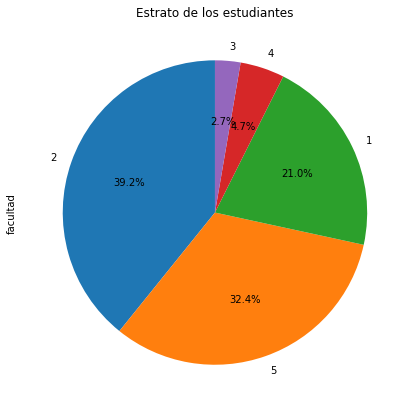

In [11]:
# What's the regional amount of biggest enterprises?

r = colum.loc[:, ['estrato']]
values = set(r.values.flatten());

colum.groupby(['estrato'])['facultad'].count().plot(kind='pie', y='values', labels=values, autopct='%1.1f%%', startangle=90);

plt.title('Estrato de los estudiantes');

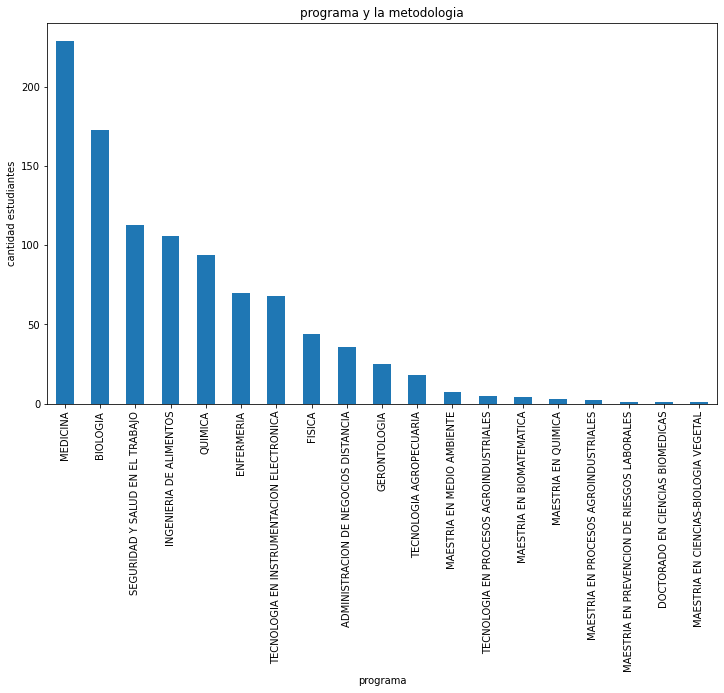

In [12]:
colum['programa'].value_counts().plot(kind='bar');

plt.xlabel('programa')
plt.ylabel('cantidad estudiantes')
plt.title("programa y la metodologia");

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!